In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import pandas as pd
from arrakis_nd import *
from scipy.cluster import hierarchy
import h5py


In [2]:
flow_file = h5py.File('/global/homes/n/ncarrara/dune/MiniRun5_1E19_RHC.flow.0000000.FLOW.hdf5')
arrakis_file = h5py.File('/global/homes/n/ncarrara/scratch/MiniRun5_1E19_RHC.arrakis.0000000.ARRAKIS.hdf5')


interactions = flow_file["mc_truth/interactions/data"]
interactions_event_id = interactions["event_id"]
interactions_vertex_id = interactions["vertex_id"]
trajectories = flow_file["mc_truth/trajectories/data"]
trajectories_event_id = trajectories['event_id']
trajectories_traj_id = trajectories['traj_id']
trajectories_vertex_it = trajectories['vertex_id']


In [3]:

charge = flow_file['charge/calib_final_hits/data']
charge_backtrack = flow_file['mc_truth/calib_final_hit_backtrack/data']
arrakis_charge = arrakis_file['charge/calib_final_hits/data']
arrakis_segment_charge = arrakis_file['charge_segment/calib_final_hits/data']
arrakis_tracklettes = arrakis_file['standard_record/tracklette']
arrakis_tracks = arrakis_file['standard_record/track']
arrakis_fragments = arrakis_file['standard_record/fragment']
arrakis_showers = arrakis_file['standard_record/shower']

arrakis_neutrino = arrakis_file['standard_record/neutrino']
events = np.unique(arrakis_charge['event_id'])
event = events[12]
print(event)
event_mask = (arrakis_charge['event_id'] == event)
event_tracklette_mask = (arrakis_tracklettes['event_id'] == event)
event_track_mask = (arrakis_tracks['event_id'] == event)
event_fragment_mask = (arrakis_fragments['event_id'] == event)
event_shower_mask = (arrakis_showers['event_id'] == event)

charge_event = charge[event_mask]
tracklette_event = arrakis_tracklettes[event_tracklette_mask]
track_event = arrakis_tracks[event_track_mask]
fragment_event = arrakis_fragments[event_fragment_mask]
shower_event = arrakis_showers[event_shower_mask]

charge_backtrack_event = charge_backtrack[event_mask]
arrakis_event = arrakis_charge[event_mask]
physics_labels = {
    -1: 'undefined',
    0: 'noise',
    1: 'mip',
    2: 'hip',
    3: 'e_ionization',
    4: 'delta',
    5: 'michel',
    6: 'compton',
    7: 'conversion',
    8: 'nr',
    9: 'er'
}
topology_labels = {
    -1: 'undefined',
    0: 'noise',
    1: 'track',
    2: 'shower',
    3: 'blip'
}
shower_labels = {
    -1: 'undefined',
    0: 'noise',
    1: 'electromagnetic',
    2: 'pion_0_decay',
    3: 'pion_plus_decay',
    4: 'pion_minus_decay',
    5: 'kaon_0_decay',
    6: 'kaon_short_decay',
    7: 'kaon_long_decay',
    8: 'kaon_plus_decay',
    9: 'kaon_minus_decay',
    10: 'd_0_decay',
    11: 'd_plus_decay',
    12: 'd_minus_decay',
    13: 'lambda_decay',
    14: 'sigma_0_decay',
    15: 'sigma_plus_decay',
    16: 'sigma_minus_decay'
}

14


In [4]:
tracklette_event

array([(14, 8,    0,               61, [[0., 0., 0.]], [[0., 0., 0.]], [[ -6.4823613,  33.9201   , -31.0613   ]], [[ -3.8664546,  33.4767   ,  -2.6837   ]], [[0., 0., 0.]], [[0., 0., 0.]], [[-0.57583755, -0.1932612 ,  0.7943936 ]], [[ 1.5741324e-01,  5.6463362e-14,  9.8753279e-01]], 33.09569 , 1.,  59.033817,  42.16701 , 0., [[2731,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]], [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
       (14, 6,    2,               61, [[0., 0., 0.]], [[0., 0., 0.]], [[-19.04949  ,  21.789    ,   2.971    ]], [[-26.504923 ,  12.669    ,  25.771    ]], [[0., 0., 0.]], [[0., 0., 0.]], [[ 0.20108022,  0.7760851 ,  0.59771127]], [[ 6.3248771e-01, -6.6984934e-01,  3.8892305e-01]], 35.461792, 1.,  79.341156,  56.672253, 0., [[2733,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]], [[1., 0., 0.,

In [5]:

event_x = charge_event['x']
event_y = charge_event['y']
event_z = charge_event['z']
event_Q = charge_event['Q']

event_topology = arrakis_event['topology']
event_particle = arrakis_event['particle']
event_physics = arrakis_event['physics']
event_unique_topology = arrakis_event['unique_topology']
event_tracklette_begin = arrakis_event['tracklette_begin']
event_tracklette_end = arrakis_event['tracklette_end']
event_fragment_begin = arrakis_event['fragment_begin']
event_fragment_end = arrakis_event['fragment_end']
event_vertex = arrakis_event['vertex']


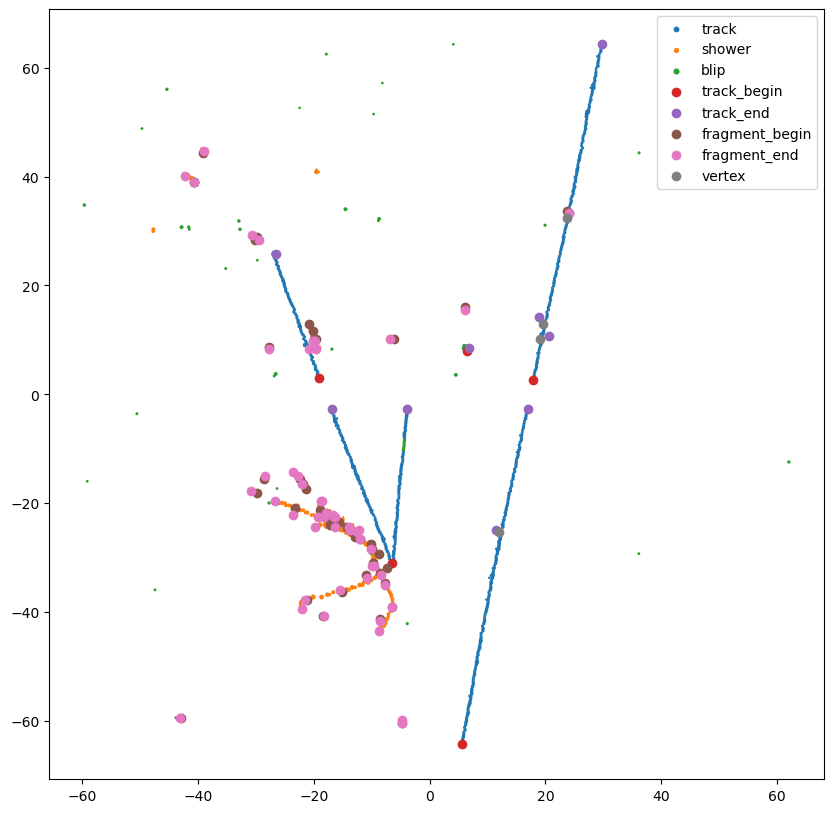

In [6]:
tracks = np.any(event_topology == 1).astype(int)
fig, axs = plt.subplots(figsize=(10,10))
for label in np.unique(event_topology):
    # if label != -1:
    #     continue
    axs.scatter(
        event_x[(event_topology == label)],
        event_z[(event_topology == label)],
        label=topology_labels[label],
        s=event_Q[(event_topology == label)] / 10
    )
axs.scatter(
    event_x[(event_tracklette_begin == 1)],
    event_z[(event_tracklette_begin == 1)],
    label='track_begin'
)
axs.scatter(
    event_x[(event_tracklette_end == 1)],
    event_z[(event_tracklette_end == 1)],
    label='track_end'
)
axs.scatter(
    event_x[(event_fragment_begin == 1)],
    event_z[(event_fragment_begin == 1)],
    label='fragment_begin'
)
axs.scatter(
    event_x[(event_fragment_end == 1)],
    event_z[(event_fragment_end == 1)],
    label='fragment_end'
)
axs.scatter(
    event_x[(event_vertex == 1)],
    event_z[(event_vertex == 1)],
    label='vertex'
)
# axs.set_xlim([-25,-10])
plt.legend()

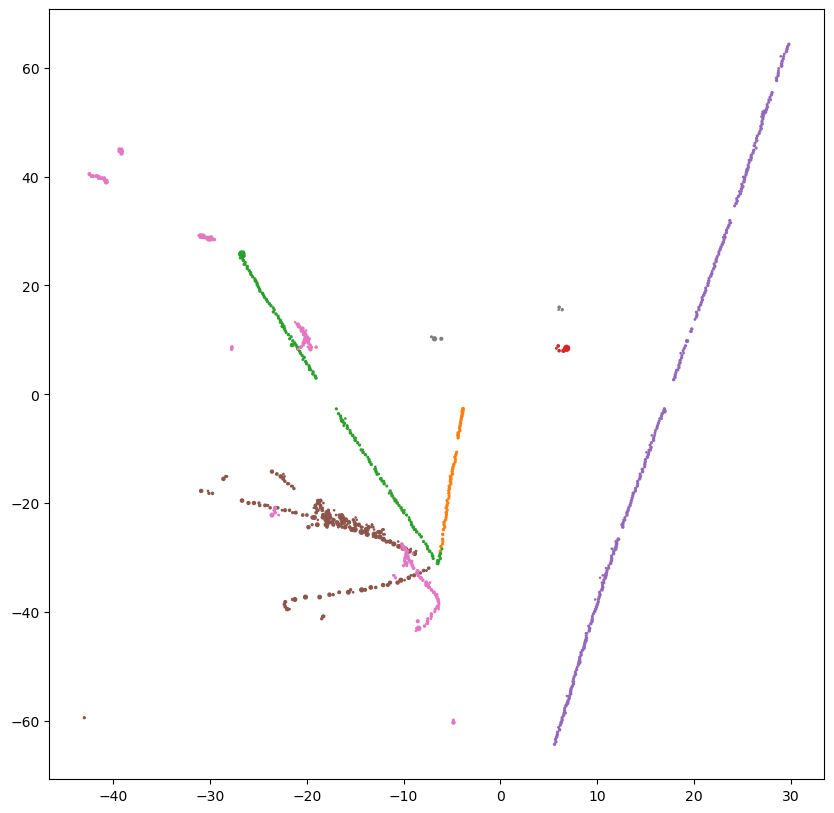

In [7]:
tracklette_topology = tracklette_event['truth'][:, 0]
shower_fragments = shower_event['fragment_ids']
fragment_topology = fragment_event['truth'][:, 0]
shower_ids = shower_event['shower_id']
shower_types = shower_event['shower_type']
shower_xyz_start = shower_event['start']


fig, axs = plt.subplots(figsize=(10,10))
for label in np.unique(tracklette_topology):
    # if label != -1:
    #     continue
    axs.scatter(
        event_x[(event_unique_topology == label)],
        event_z[(event_unique_topology == label)],
        label=label,
        s=event_Q[(event_unique_topology == label)] / 10
    )
for ii, shower in enumerate(shower_ids):
    shower_fragment = shower_fragments[ii][0]
    fragment_x = []
    fragment_y = []
    fragment_z = []
    fragment_Q = []
    for fragment in shower_fragment:
        if fragment == -1:
            break
        fragment_id = fragment_topology[np.where(fragment_event['fragment_id'] == fragment)[0]][0]
        
        topology_mask = event_unique_topology == fragment_id[0]
        
        fragment_x.append(event_x[topology_mask])
        fragment_y.append(event_y[topology_mask])
        fragment_z.append(event_z[topology_mask])
        fragment_Q.append(event_Q[topology_mask] / 10)
    fragment_x = np.concatenate(fragment_x)
    fragment_y = np.concatenate(fragment_y)
    fragment_z = np.concatenate(fragment_z)
    fragment_Q = np.concatenate(fragment_Q)
    axs.scatter(
        fragment_x,
        fragment_z,
        s=fragment_Q,
        label=shower_labels[shower_types[ii]]
    )
    # axs.scatter(
    #     shower_xyz_start[ii][0][0],
    #     shower_xyz_start[ii][0][2],
    #     marker='x',
    #     color='k'
    # )


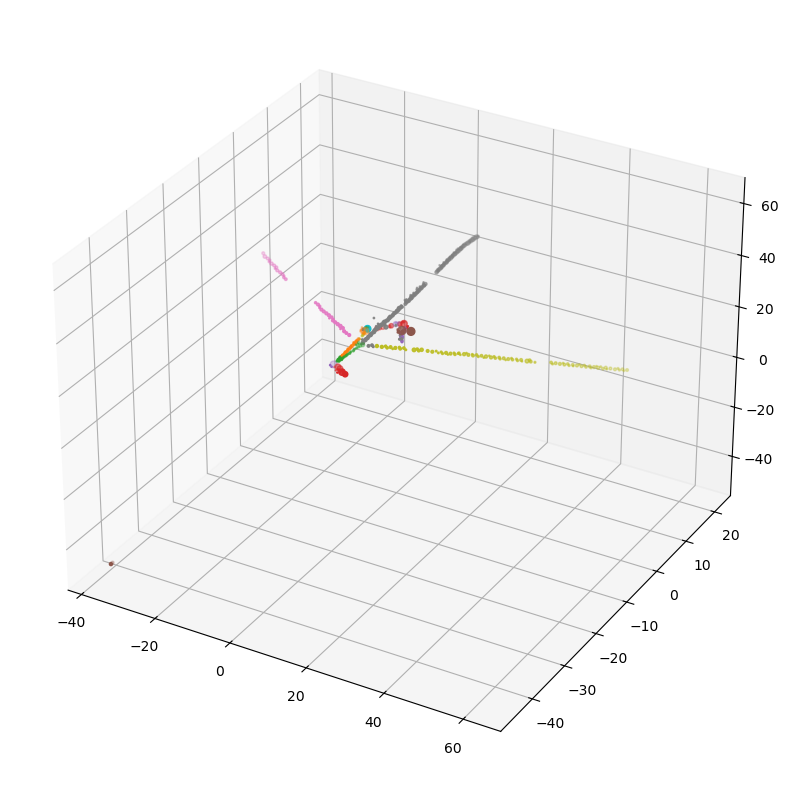

In [66]:
tracklette_topology = tracklette_event['truth'][:, 0]

fig = plt.figure(figsize=(10,10))
axs = fig.add_subplot(projection='3d')
for label in np.unique(tracklette_topology):
    # if label != -1:
    #     continue
    axs.scatter(
        event_x[(event_unique_topology == label)],
        event_z[(event_unique_topology == label)],
        event_y[(event_unique_topology == label)],
        label=label,
        s=event_Q[(event_unique_topology == label)] / 10
    )

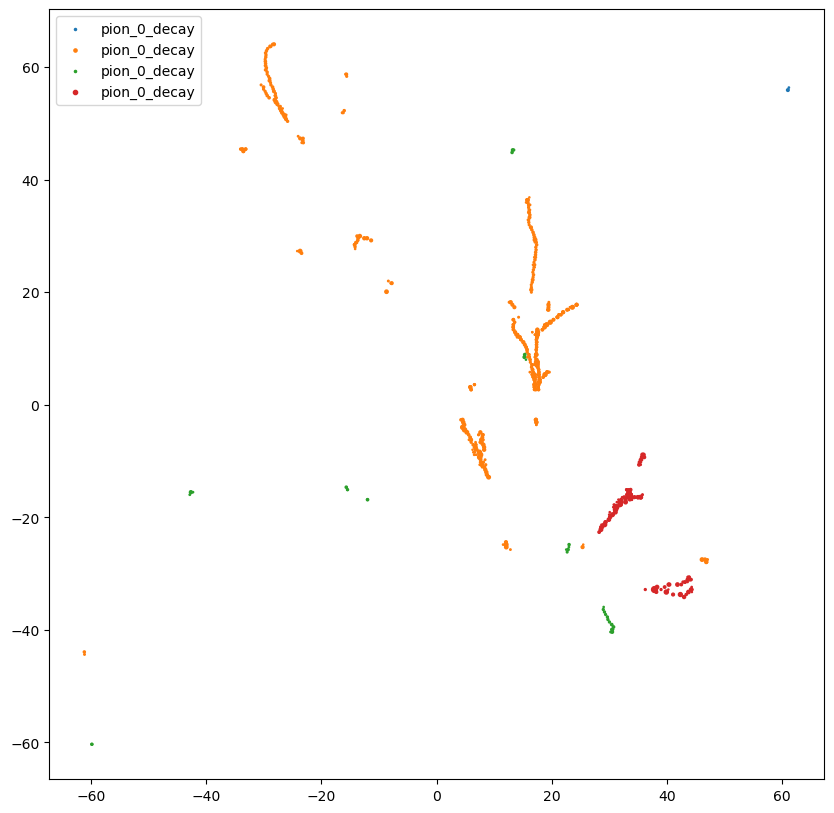

In [57]:
shower_fragments = shower_event['fragment_ids']
fragment_topology = fragment_event['truth'][:, 0]
shower_ids = shower_event['shower_id']
shower_types = shower_event['shower_type']

fig, axs = plt.subplots(figsize=(10,10))
for ii, shower in enumerate(shower_ids):
    shower_fragment = shower_fragments[ii][0]
    fragment_x = []
    fragment_y = []
    fragment_z = []
    fragment_Q = []
    for fragment in shower_fragment:
        if fragment == -1:
            break
        fragment_id = fragment_topology[np.where(fragment_event['fragment_id'] == fragment)[0]][0]
        
        topology_mask = event_unique_topology == fragment_id[0]
        
        fragment_x.append(event_x[topology_mask])
        fragment_y.append(event_y[topology_mask])
        fragment_z.append(event_z[topology_mask])
        fragment_Q.append(event_Q[topology_mask] / 10)
    fragment_x = np.concatenate(fragment_x)
    fragment_y = np.concatenate(fragment_y)
    fragment_z = np.concatenate(fragment_z)
    fragment_Q = np.concatenate(fragment_Q)
    axs.scatter(
        fragment_x,
        fragment_z,
        s=fragment_Q,
        label=shower_labels[shower_types[ii]]
    )
plt.legend()

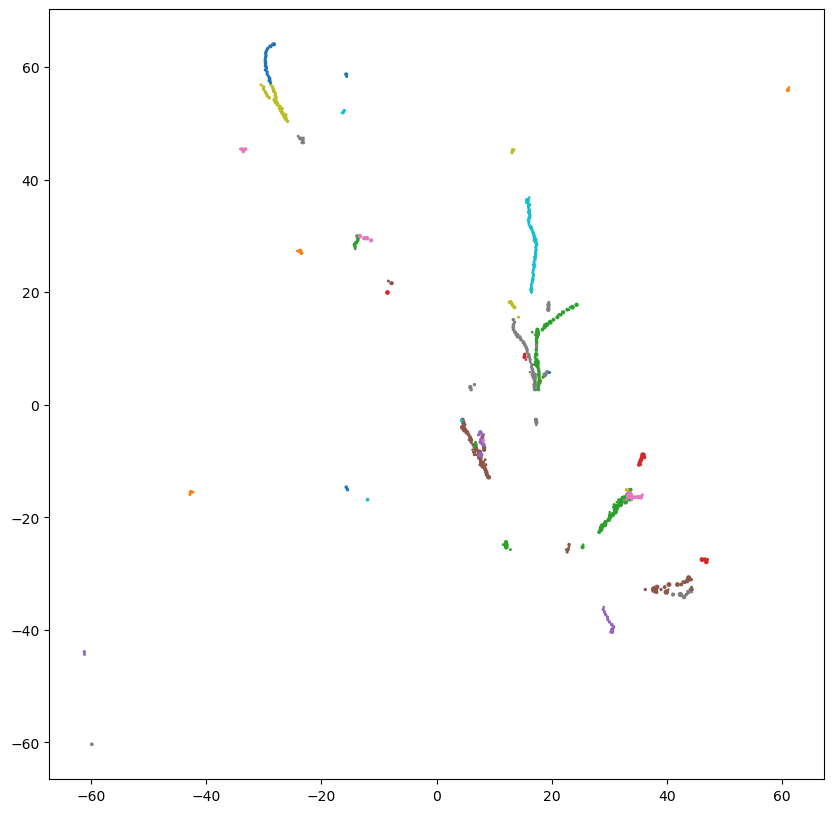

In [58]:
fragment_topology = fragment_event['truth'][:, 0]

fig, axs = plt.subplots(figsize=(10,10))
for label in np.unique(fragment_topology):
    # if label != -1:
    #     continue
    axs.scatter(
        event_x[(event_unique_topology == label)],
        event_z[(event_unique_topology == label)],
        label=label,
        s=event_Q[(event_unique_topology == label)] / 10
    )

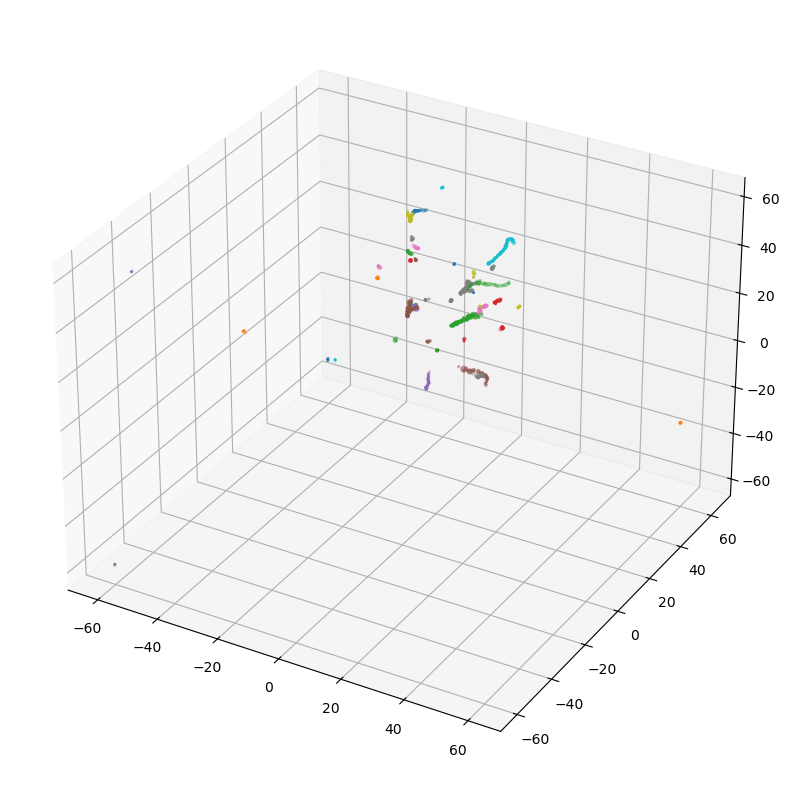

In [59]:
fragment_topology = fragment_event['truth'][:, 0]

fig = plt.figure(figsize=(10,10))
axs = fig.add_subplot(projection='3d')
for label in np.unique(fragment_topology):
    # if label != -1:
    #     continue
    axs.scatter(
        event_x[(event_unique_topology == label)],
        event_z[(event_unique_topology == label)],
        event_y[(event_unique_topology == label)],
        label=label,
        s=event_Q[(event_unique_topology == label)] / 10
    )

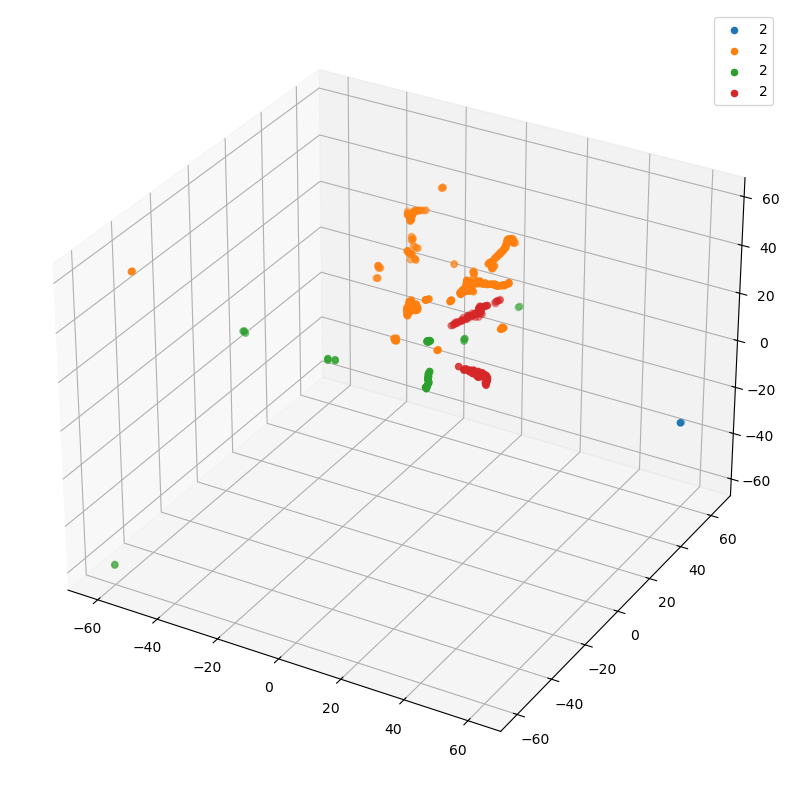

In [52]:
shower_fragments = shower_event['fragment_ids']
fragment_topology = fragment_event['truth'][:, 0]
shower_ids = shower_event['shower_id']
shower_types = shower_event['shower_type']

fig = plt.figure(figsize=(10,10))
axs = fig.add_subplot(projection='3d')
for ii, shower in enumerate(shower_ids):
    shower_fragment = shower_fragments[ii][0]
    fragment_x = []
    fragment_y = []
    fragment_z = []
    for fragment in shower_fragment:
        if fragment == -1:
            break
        fragment_id = fragment_topology[np.where(fragment_event['fragment_id'] == fragment)[0]][0]
        
        topology_mask = event_unique_topology == fragment_id[0]
        
        fragment_x.append(event_x[topology_mask])
        fragment_y.append(event_y[topology_mask])
        fragment_z.append(event_z[topology_mask])
    fragment_x = np.concatenate(fragment_x)
    fragment_y = np.concatenate(fragment_y)
    fragment_z = np.concatenate(fragment_z)
    axs.scatter(
        fragment_x,
        fragment_z,
        fragment_y,
        label=shower_types[ii]
    )
plt.legend()
    
    

In [ ]:
fragment_topology = fragment_event['truth'][:, 0]

fig = plt.figure(figsize=(10,10))
axs = fig.add_subplot(projection='3d')
for label in np.unique(fragment_topology):
    # if label != -1:
    #     continue
    axs.scatter(
        event_x[(event_unique_topology == label)],
        event_z[(event_unique_topology == label)],
        event_y[(event_unique_topology == label)],
        label=label,
        s=event_Q[(event_unique_topology == label)] / 10
    )

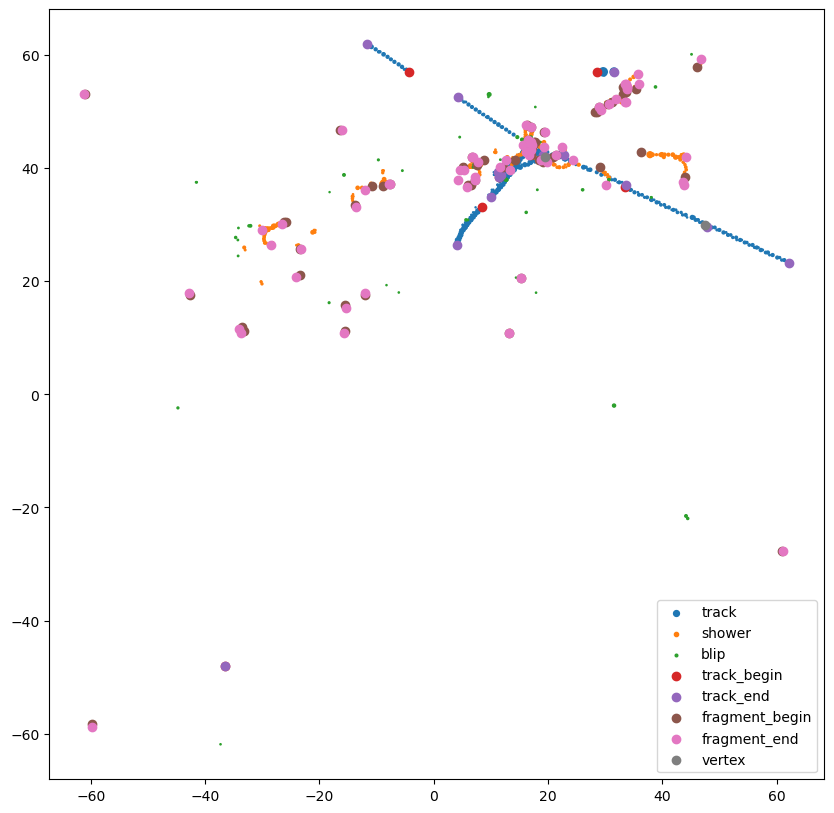

In [7]:
tracks = np.any(event_topology == 1).astype(int)
fig, axs = plt.subplots(figsize=(10,10))
for label in np.unique(event_topology):
    axs.scatter(
        event_x[(event_topology == label)],
        event_y[(event_topology == label)],
        label=topology_labels[label],
        s=event_Q[(event_topology == label)] / 10
    )
axs.scatter(
    event_x[(event_tracklette_begin == 1)],
    event_y[(event_tracklette_begin == 1)],
    label='track_begin'
)
axs.scatter(
    event_x[(event_tracklette_end == 1)],
    event_y[(event_tracklette_end == 1)],
    label='track_end'
)
axs.scatter(
    event_x[(event_fragment_begin == 1)],
    event_y[(event_fragment_begin == 1)],
    label='fragment_begin'
)
axs.scatter(
    event_x[(event_fragment_end == 1)],
    event_y[(event_fragment_end == 1)],
    label='fragment_end'
)
axs.scatter(
    event_x[(event_vertex == 1)],
    event_y[(event_vertex == 1)],
    label='vertex'
)
# axs.set_xlim([-25,-10])
plt.legend()

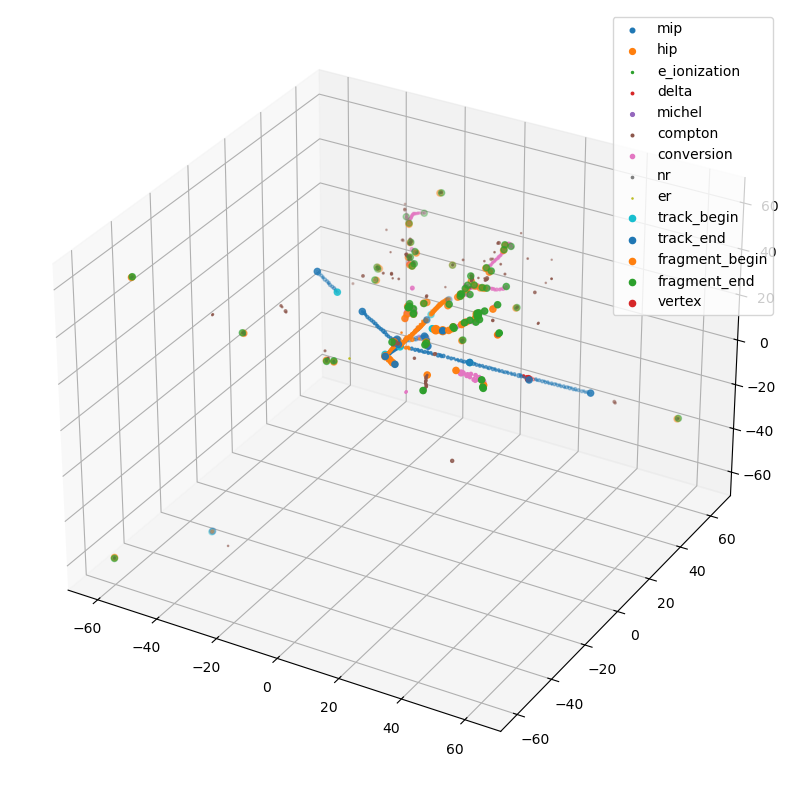

In [8]:
fig = plt.figure(figsize=(10,10))
axs = fig.add_subplot(projection='3d')
for label in np.unique(event_physics):
    axs.scatter(
        event_x[(event_physics == label)],
        event_z[(event_physics == label)],
        event_y[(event_physics == label)],
        label=physics_labels[label],
        s=event_Q[(event_physics == label)] / 10
    )
axs.scatter(
    event_x[(event_tracklette_begin == 1)],
    event_z[(event_tracklette_begin == 1)],
    event_y[(event_tracklette_begin == 1)],
    label='track_begin'
)
axs.scatter(
    event_x[(event_tracklette_end == 1)],
    event_z[(event_tracklette_end == 1)],
    event_y[(event_tracklette_end == 1)],
    label='track_end'
)
axs.scatter(
    event_x[(event_fragment_begin == 1)],
    event_z[(event_fragment_begin == 1)],
    event_y[(event_fragment_begin == 1)],
    label='fragment_begin'
)
axs.scatter(
    event_x[(event_fragment_end == 1)],
    event_z[(event_fragment_end == 1)],
    event_y[(event_fragment_end == 1)],
    label='fragment_end'
)
axs.scatter(
    event_x[(event_vertex == 1)],
    event_z[(event_vertex == 1)],
    event_y[(event_vertex == 1)],
    label='vertex'
)
plt.legend()

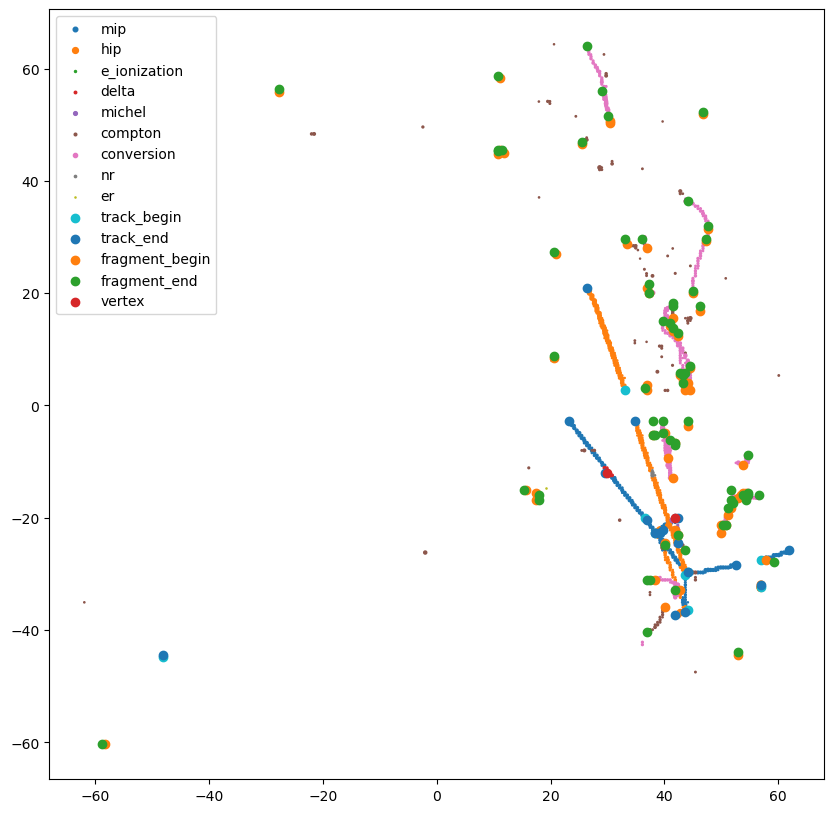

In [9]:
tracks = np.any(event_topology == 1).astype(int)
fig, axs = plt.subplots(figsize=(10,10))
for label in np.unique(event_physics):
    axs.scatter(
        event_y[(event_physics == label)],
        event_z[(event_physics == label)],
        label=physics_labels[label],
        s=event_Q[(event_physics == label)] / 10
    )
axs.scatter(
    event_y[(event_tracklette_begin == 1)],
    event_z[(event_tracklette_begin == 1)],
    label='track_begin'
)
axs.scatter(
    event_y[(event_tracklette_end == 1)],
    event_z[(event_tracklette_end == 1)],
    label='track_end'
)
axs.scatter(
    event_y[(event_fragment_begin == 1)],
    event_z[(event_fragment_begin == 1)],
    label='fragment_begin'
)
axs.scatter(
    event_y[(event_fragment_end == 1)],
    event_z[(event_fragment_end == 1)],
    label='fragment_end'
)
axs.scatter(
    event_y[(event_vertex == 1)],
    event_z[(event_vertex == 1)],
    label='vertex'
)
# axs.set_xlim([-25,-10])
plt.legend()

In [ ]:
det_features = arr['det_features'][event]
mc_features = arr['mc_features'][event]
classes = arr['classes'][event]
clusters = arr['clusters'][event]
particles = arr['particles'][event]
tracks = arr['tracks'][event]
track_topology = arr['track_topology'][event]

x = det_features[:, 0]
y = det_features[:, 1]
z = det_features[:, 2]
q = det_features[:, 3]
xyz = det_features[:,0:2]
q /= np.mean(q)

num_photons = mc_features[:, 2]
num_photons /= np.mean(num_photons)

particle_labels = classes[:, 0]
topology_labels = classes[:, 1]
physics_micro_labels = classes[:, 2]
physics_meso_labels = classes[:, 3]
physics_macro_labels = classes[:, 4]

unique_particle_labels = clusters[:, 0]
unique_topology_labels = clusters[:, 1]
unique_physics_micro_labels = clusters[:, 2]
unique_physics_meso_labels = clusters[:, 3]
unique_physics_macro_labels = clusters[:, 4] 

df = pd.DataFrame(columns=['x', 'y', 'z', 'particle_label', 'physics_label', 'topology_label', 'unique_topology'])
particle_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['particle_labels'], orient='index', columns=['particle_label_text']).reset_index()
physics_micro_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['physics_micro_labels'], orient='index', columns=['physics_micro_label_text']).reset_index()
physics_meso_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['physics_meso_labels'], orient='index', columns=['physics_meso_label_text']).reset_index()
physics_macro_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['physics_macro_labels'], orient='index', columns=['physics_macro_label_text']).reset_index()
topology_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['topology_labels'], orient='index', columns=['topology_label_text']).reset_index()
df['x'] = x
df['y'] = y
df['z'] = z
df['Q'] = q
df['particle_label'] = particle_labels
df['physics_micro_label'] = physics_micro_labels
df['physics_meso_label'] = physics_meso_labels
df['physics_macro_label'] = physics_macro_labels
df['topology_label'] = topology_labels
df['unique_topology_label'] = unique_topology_labels
df = df.merge(particle_label_df, how='left', left_on='particle_label', right_on='index')
df = df.merge(physics_micro_label_df, how='left', left_on='physics_micro_label', right_on='index')
df = df.merge(physics_meso_label_df, how='left', left_on='physics_meso_label', right_on='index')
df = df.merge(physics_macro_label_df, how='left', left_on='physics_macro_label', right_on='index')
df = df.merge(topology_label_df, how='left', left_on='topology_label', right_on='index')


In [ ]:
Z = hierarchy.linkage(xyz)
fig, axs = plt.subplots(figsize=(10,10))
dend = hierarchy.dendrogram(Z, p=30, truncate_mode='lastp', ax=axs)

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
print(track_topology)
ax.scatter(z,x)
track_mask = (track_topology[:, 1] == 1) | (track_topology[:, 2] == 1)
delta_mask = (track_topology[:, 3] == 1) | (track_topology[:, 4] == 1)
hit_x = x[track_mask]
hit_y = y[track_mask]
hit_z = z[track_mask]

delta_x = x[delta_mask]
delta_y = y[delta_mask]
delta_z = z[delta_mask]

# hit_x = [x[tracks[5][ii]], x[tracks[10][ii]]]
# hit_y = [y[tracks[5][ii]], y[tracks[10][ii]]]
# hit_z = [z[tracks[5][ii]], z[tracks[10][ii]]]
ax.scatter(hit_z, hit_x, c='r')
ax.scatter(delta_z, delta_x, c='g')
ax.set_xlabel("z [mm]")
ax.set_ylabel("x [mm]")
plt.legend()

In [ ]:
sn.relplot(
    data=df,
    x="z", y="x",
    hue="particle_label_text",
    linewidth=0,
    s=10,
    height=10
)
plt.show()

In [ ]:
sn.relplot(
    data=df,
    x="z", y="x",
    hue="physics_micro_label_text",
    linewidth=0,
    s=10,
    height=10
    
)
plt.show()

In [ ]:
sn.relplot(
    data=df,
    x="z", y="x",
    hue="physics_meso_label_text",
    linewidth=0,
    s=10,
    height=10
)
plt.show()

In [ ]:
sn.relplot(
    data=df,
    x="z", y="x",
    hue="topology_label_text",
    linewidth=0,
    s=10,
    height=10
)
plt.show()

In [ ]:
sn.relplot(
    data=df,
    x="z", y="x",
    hue="physics_macro_label_text",
    linewidth=0,
    s=10,
    height=10
)
plt.show()

In [ ]:
sn.relplot(
    data=df,
    x="z", y="x",
    hue="unique_topology_label",
    linewidth=0,
    s=10,
    height=10
)
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))
plot1 = axs[0].scatter(x,y, c=physics_micro_labels, cmap='Paired')
axs[0].set_title('Physics labels')
axs[0].set_xlabel('x')
axs[0].set_xlabel('y')
plt.colorbar(plot1, ax=axs[0])
plot2 = axs[1].scatter(x,y, c=particle_labels, cmap='Paired')
axs[1].set_title('Particle labels')
axs[1].set_xlabel('x')
axs[1].set_xlabel('y')
plt.colorbar(plot2, ax=axs[1])
plot3 = axs[2].scatter(x,y, c=topology_labels, cmap='Paired')
axs[2].set_title('Topology labels')
axs[2].set_xlabel('x')
axs[2].set_xlabel('y')
plt.colorbar(plot3, ax=axs[2])

plt.show()

In [ ]:
physics_micro_labels_full = []
for i, cloud in enumerate(physics_macro_labels):
    physics_micro_labels_full.append(physics_macro_labels[cloud].data['physics_micro_label'])
physics_meso_labels_full = []
for i, cloud in enumerate(physics_macro_labels):
    physics_meso_labels_full.append(physics_macro_labels[cloud].data['physics_meso_label'])
physics_macro_labels_full = []
for i, cloud in enumerate(physics_macro_labels):
    physics_macro_labels_full.append(arr['data'].tolist()[cloud].data['physics_macro_label'])
                          

In [ ]:
plt.hist([item for sublist in physics_micro_labels_full for item in sublist], bins=100)
plt.xlabel('physics_micro label')
plt.show()

In [ ]:
plt.hist([item for sublist in physics_meso_labels_full for item in sublist], bins=100)
plt.xlabel('physics_meso label')
plt.show()

In [ ]:
plt.hist([item for sublist in physics_macro_labels_full for item in sublist], bins=100)
plt.xlabel('physics_macro label')
plt.show()

In [ ]:
particle_labels_full = []
for i, cloud in enumerate(arr['data'].tolist()):
    particle_labels_full.append(arr['data'].tolist()[cloud].data['particle_label'])

In [ ]:
np.unique([item for sublist in particle_labels_full for item in sublist])

In [ ]:
dd = pd.DataFrame([item for sublist in particle_labels_full for item in sublist])
dd.value_counts().plot(kind='bar')
#plt.hist([item for sublist in particle_labels_full for item in sublist], bins=np.unique([item for sublist in particle_labels_full for item in sublist]))
plt.xlabel('particle label')
#plt.xlim(-23, 23)
plt.show()

In [ ]:
topology_labels_full = []
for i, cloud in enumerate(arr['data'].tolist()):
    topology_labels_full.append(arr['data'].tolist()[cloud].data['topology_label'])

In [ ]:
plt.hist([item for sublist in topology_labels_full for item in sublist])
plt.xlabel('topology label')
plt.show()